In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nbuser/anaconda3_501/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(

### Clean Data a bit

In [3]:
auto_prices = pd.read_csv('dataset/Automobile price data Raw.csv')

def clean_auto_data(auto_prices):
    
    ## Recode names
    ## fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    auto_prices.columns = [str.replace('-', '_') for str in cols]
    
    ## Treat missing values
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak_rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column] == '?', column] = np.nan
    auto_prices.dropna(axis=0, inplace=True)

    ## Transform column data type
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])

    return auto_prices

auto_prices = clean_auto_data(auto_prices)

#print(auto_prices.columns)

### BarChart using pandas

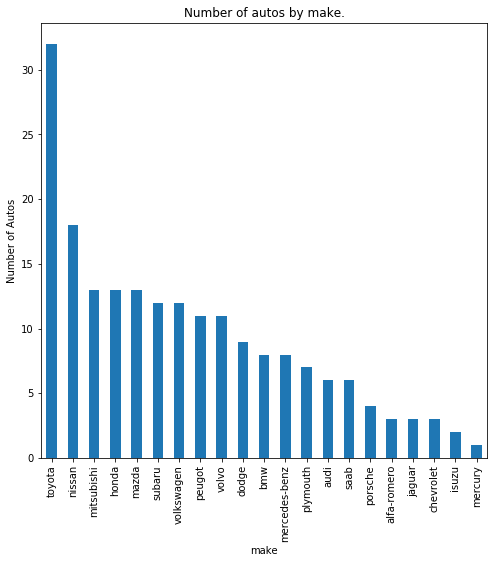

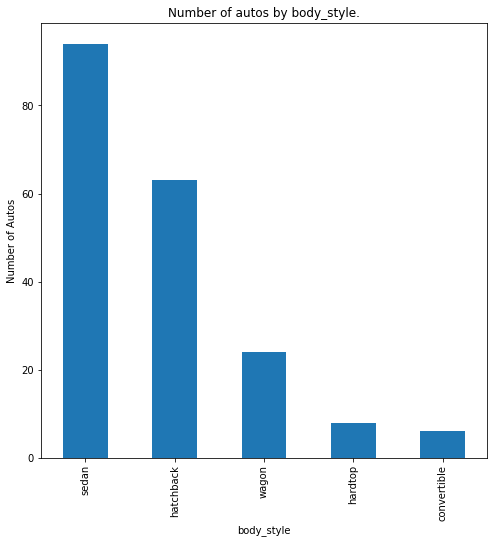

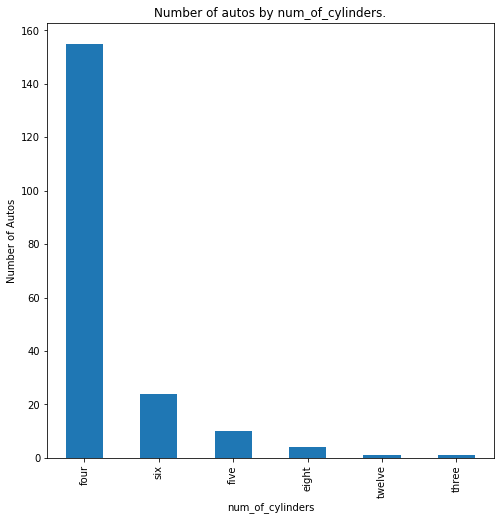

In [4]:
cols = ['make', 'body_style', 'num_of_cylinders']

for col in cols:
    fig = plt.figure(figsize=(8,8)) #define fig size
    ax = fig.gca()
    counts = auto_prices[col].value_counts()
    counts.plot.bar()
    ax.set_title("Number of autos by %s." % col)
    ax.set_xlabel(col)
    ax.set_ylabel("Number of Autos")
    plt.show()

### Histograms using pandas

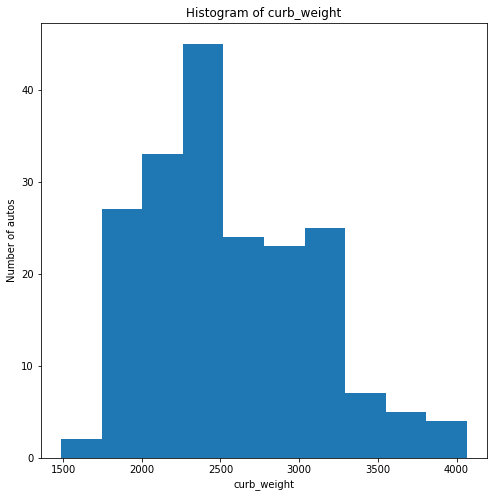

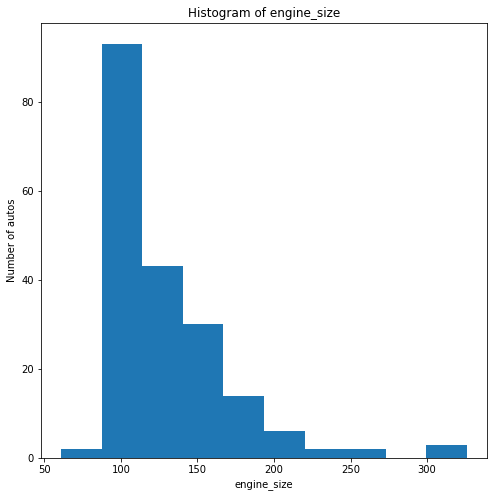

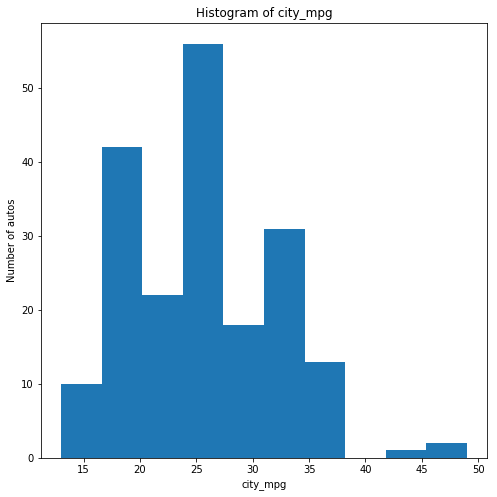

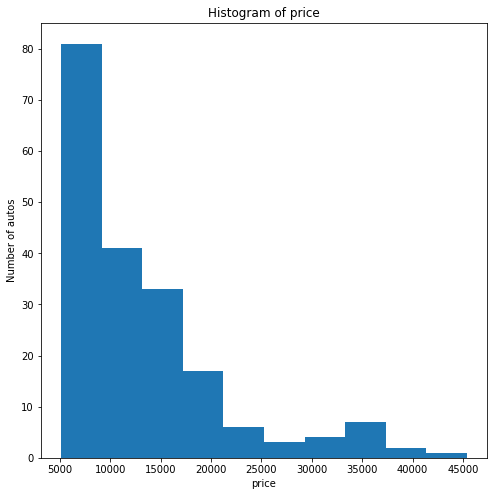

In [7]:
def plot_histogram(auto_prices, cols, bins = 10):
    for col in cols:
        fig = plt.figure(figsize=(8,8)) # define plot area
        ax = fig.gca() # define axis  
        
        #######################################################################################################
        auto_prices[col].plot.hist(ax=ax, bins=bins) # Use the plot.hist method on subset of the data frame
        #######################################################################################################
        
        ax.set_title('Histogram of %s' % col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of autos')# Set text for y axis
        plt.show()
        
num_cols = ['curb_weight', 'engine_size', 'city_mpg', 'price']    
plot_histogram(auto_prices, num_cols)

### Kernel density estimate(KDE) with histograms using Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


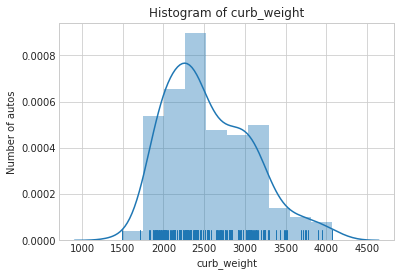

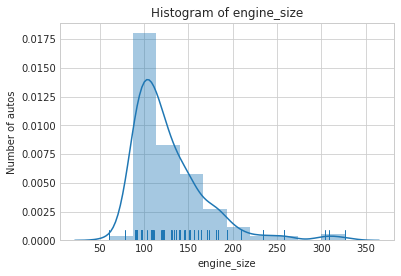

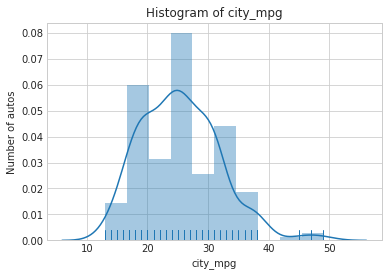

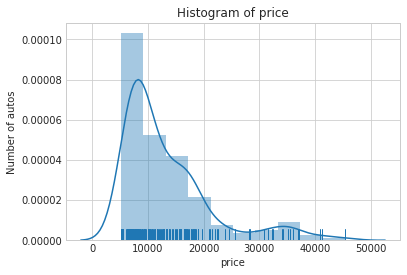

In [35]:
def plot_density_hist(auto_prices, cols, bins=10, hist=False):
    for col in cols:
        #Styles: darkgrid, whitegrid, dark, white, ticks
        sns.set_style("whitegrid")
        
        #sns.distplot:Flexibly plot a univariate distribution of observations.
        sns.distplot(auto_prices[col], bins=bins, rug=True, hist=hist)
        plt.title('Histogram of %s' % col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of autos')# Set text for y axis
        plt.show()
        
plot_density_hist(auto_prices, num_cols, hist=True) 

### Scatter Plots using Pandas with transparency 

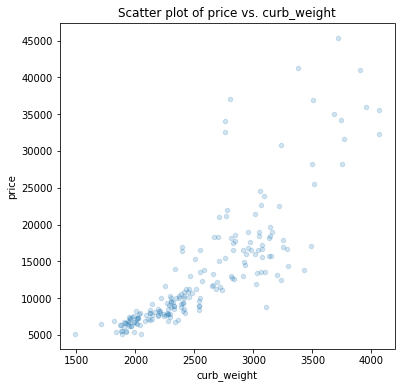

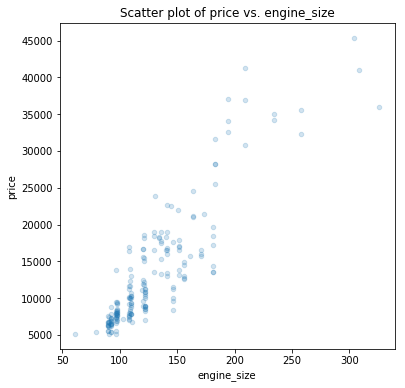

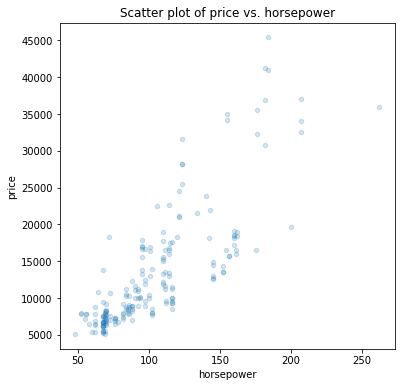

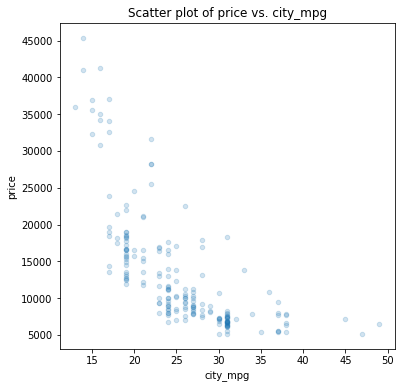

In [9]:
#Plot columns against price
def plot_scatter(auto_prices, cols, col_y='price', alpha=1.0):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis   
        auto_prices.plot.scatter(x=col, y=col_y, ax=ax, alpha=alpha)
        ax.set_title('Scatter plot of %s vs. %s' %(col_y,col)) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = ['curb_weight', 'engine_size', 'horsepower', 'city_mpg']
plot_scatter(auto_prices, num_cols, alpha=0.2)   

## 2D density/2D hexbin plots 
using seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


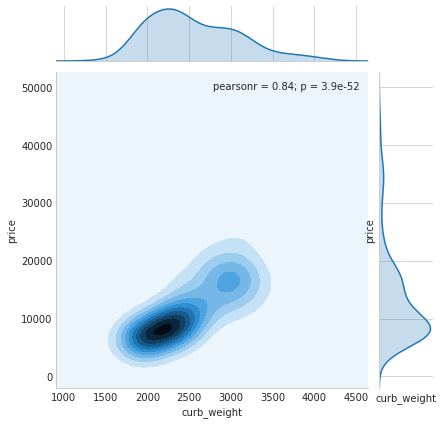

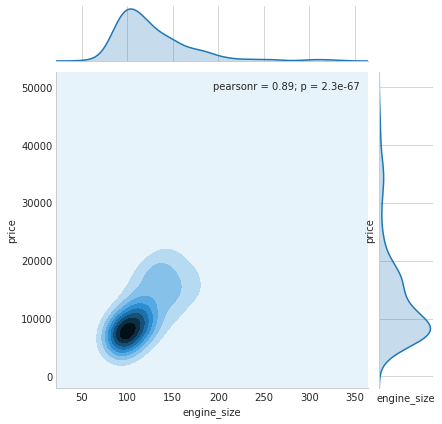

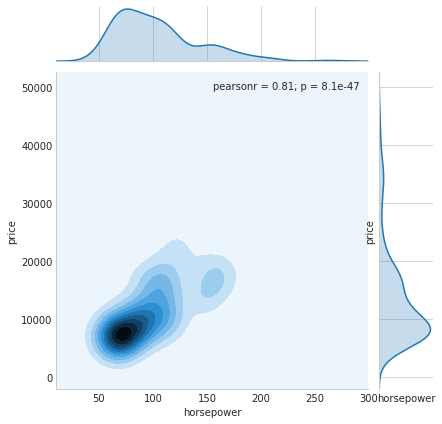

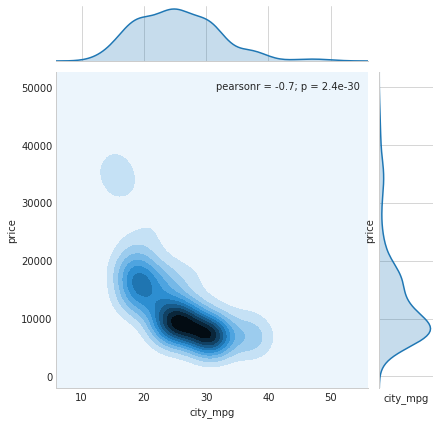

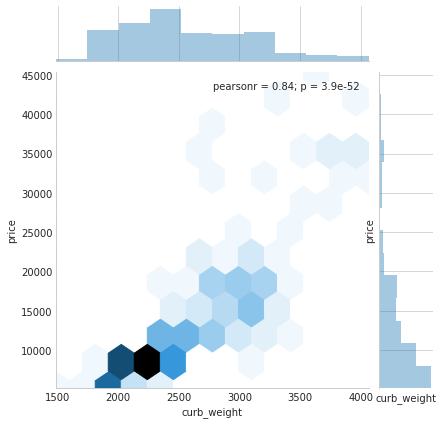

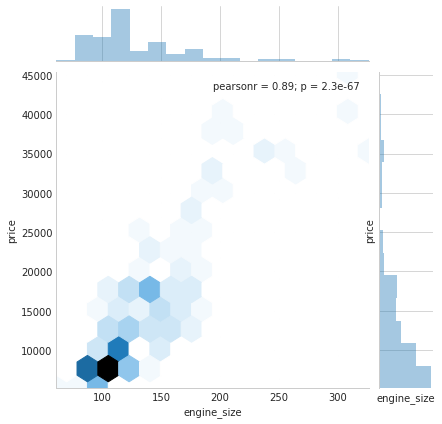

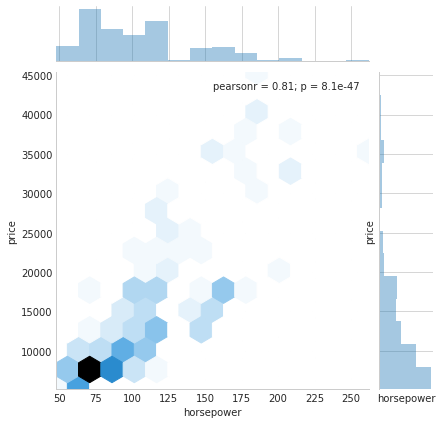

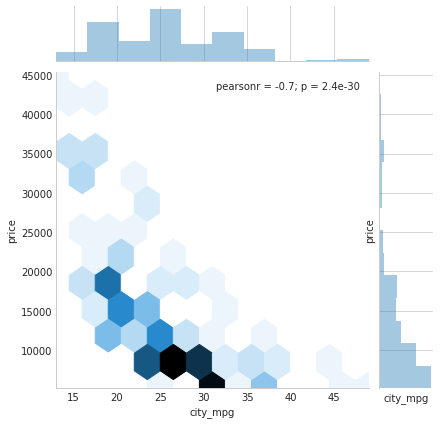

In [40]:
def plot_desity_2d(auto_prices, cols, col_y = 'price', kind ='kde'):
    for col in cols:
        sns.set_style("whitegrid")
        
        #sns.jointplot:Draw a plot of two variables with bivariate and univariate graphs. 
        sns.jointplot(col, col_y, data=auto_prices, kind=kind)
        
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()

plot_desity_2d(auto_prices, num_cols, kind="kde")   
plot_desity_2d(auto_prices, num_cols, kind="hex")   

## Box plot using seaborn

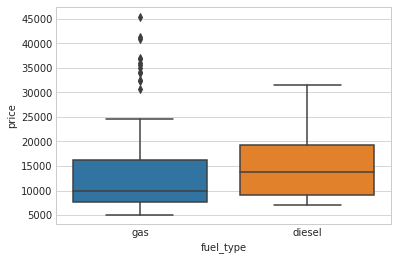

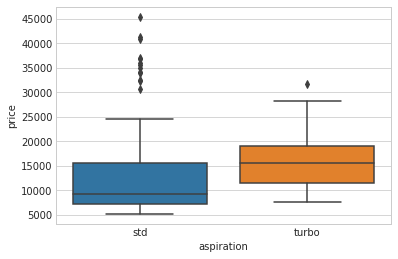

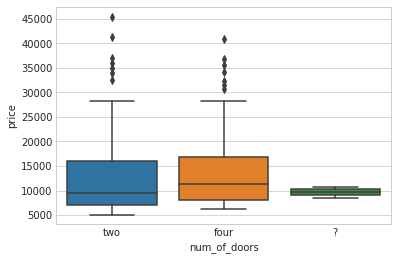

In [24]:
def plot_box(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        
        #sns.boxplot:Draw a box plot to show distributions with respect to categories.
        sns.boxplot(col, col_y, data=auto_prices)
        
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
cat_cols = ['fuel_type', 'aspiration', 'num_of_doors']
plot_box(auto_prices, cat_cols)  

### Violin Plots using Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


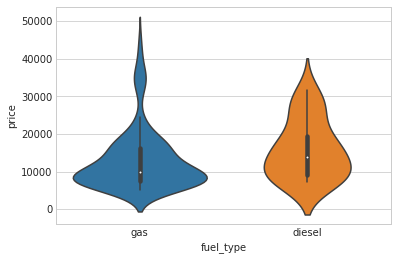

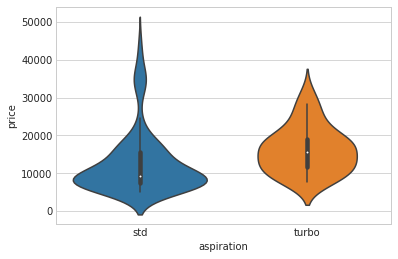

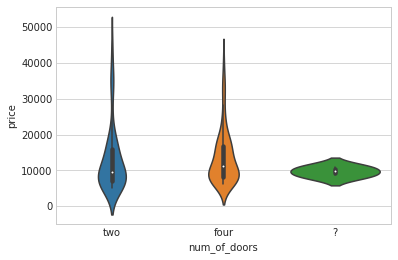

In [43]:
def plot_violin(auto_prices, cols, col_y = 'price'):
    for col in cols:
        sns.set_style("whitegrid")
        
        #sns.violinplot:Draw a combination of boxplot and kernel density estimate.
        sns.violinplot(col, col_y, data=auto_prices)
        
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin(auto_prices, cat_cols)   

### Adding shape,size and color in scatter plot using Seaborn

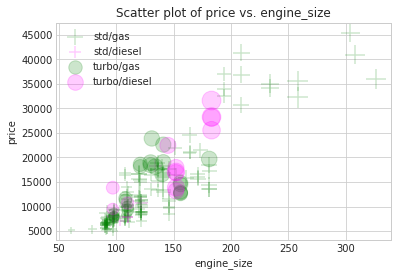

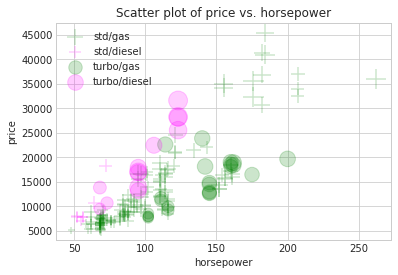

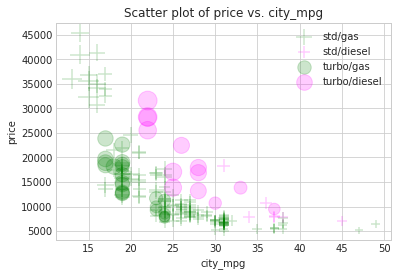

In [22]:
def plot_scatter_shape_size_col(auto_prices, cols, shape_col='aspiration', size_col='curb_weight',
                            size_mul=0.000025, color_col='fuel_type' , col_y='price', alpha = 0.2):
    shapes = ['+', 'o', 's', 'x', '^'] # pick distinctive markers
    colors = ['green', 'magenta', 'orange', 'blue', 'gray'] # specify distinctive colors
    unique_shapes = auto_prices[shape_col].unique()
    unique_colors = auto_prices[color_col].unique()
    
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for shape, unique_shape in zip(shapes, unique_shapes): # loop over the unique categories
            for color, unique_color in zip(colors, unique_colors):
                #filter data for giving shape and color
                temp = auto_prices[(auto_prices[shape_col] == unique_shape) & (auto_prices[color_col] == unique_color)]
                
                #sns.regplot:Plot data and a linear regression model fit.
                sns.regplot(col, col_y, data=temp, marker=shape,
                            scatter_kws={"alpha":alpha, "s":size_mul*temp[size_col]**2}, 
                            label = ("%s/%s" % (unique_shape, unique_color)), fit_reg = False, color=color)
                
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()

num_cols = ['engine_size', 'horsepower', 'city_mpg']        
plot_scatter_shape_size_col(auto_prices, num_cols) 

### Violin plot with hue using Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


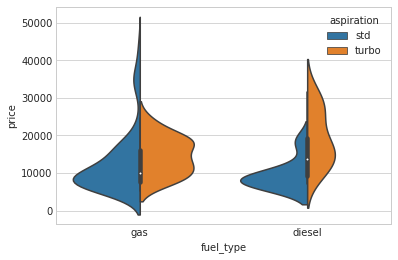

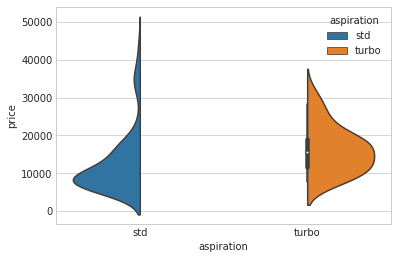

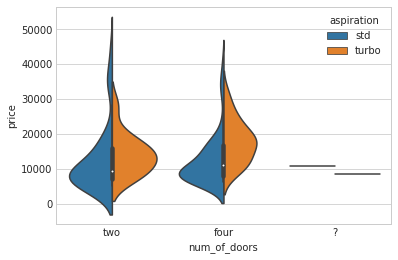

In [27]:
def plot_violin_hue(auto_prices, cols, col_y = 'price', hue_col = 'aspiration'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.violinplot(col, col_y, data=auto_prices, hue=hue_col, split = True)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.show()
        
plot_violin_hue(auto_prices, cat_cols)    

### Pair-wise scatter plot with hue and markers using Seaborn

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color', 'marker'
  s)


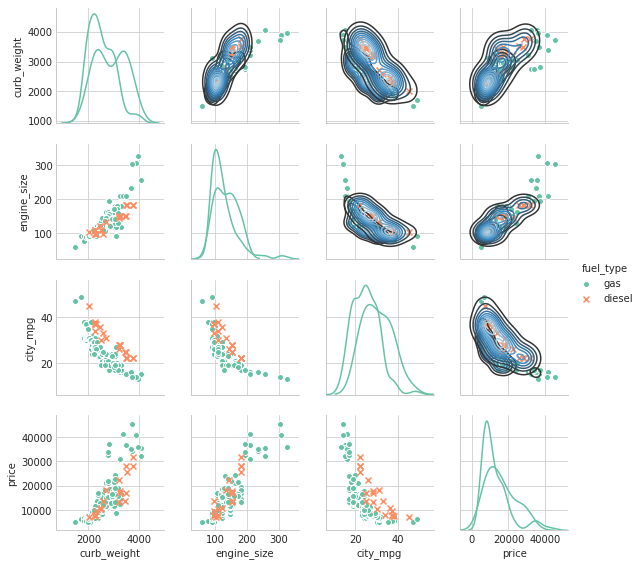

In [35]:
data_cols = ["curb_weight", "engine_size", "city_mpg", "price", "fuel_type"]

#Signature: sns.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)
#sns.pairplot: Plot pairwise relationships in a dataset.
sns.pairplot(auto_prices[data_cols], hue='fuel_type', palette="Set2", diag_kind="kde", size=2, markers=["o", "x"] ).map_upper(sns.kdeplot, cmap="Blues_d")

### Conditioned histograms using Seaborn FacetGrid + matplotlib.pyplot.hist

'drive_wheels'

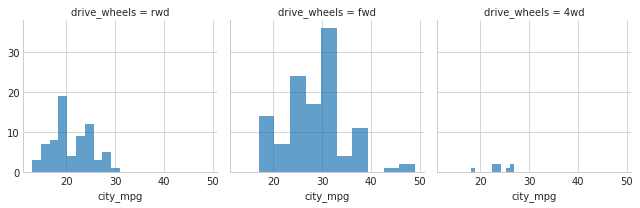

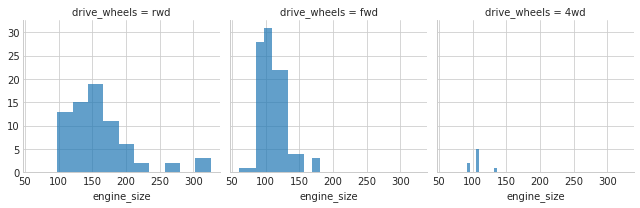

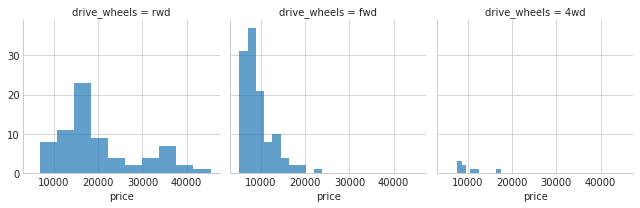

In [53]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):

    ## Loop over the list of columns
    for col in plot_cols:
        grid = sns.FacetGrid(df, col=grid_col)
        grid.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
data_cols = ["city_mpg", "engine_size", "price"]

cond_hists(auto_prices, data_cols, 'drive_wheels')

### Conditioned scatter plot using Seaborn FacetGrid + regplot , col/row matrix

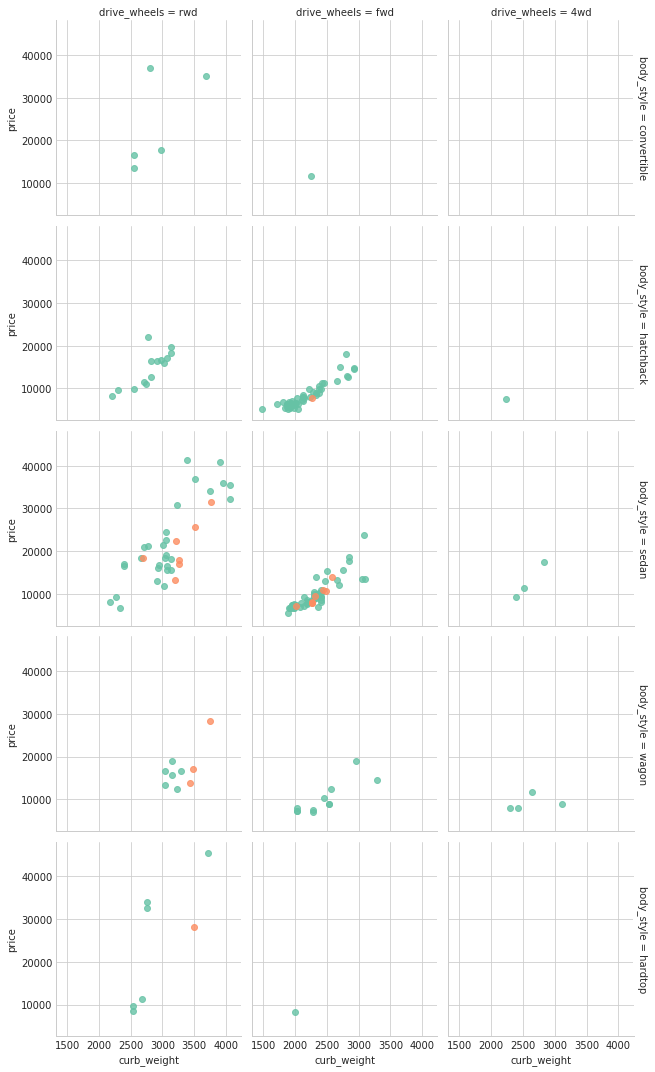

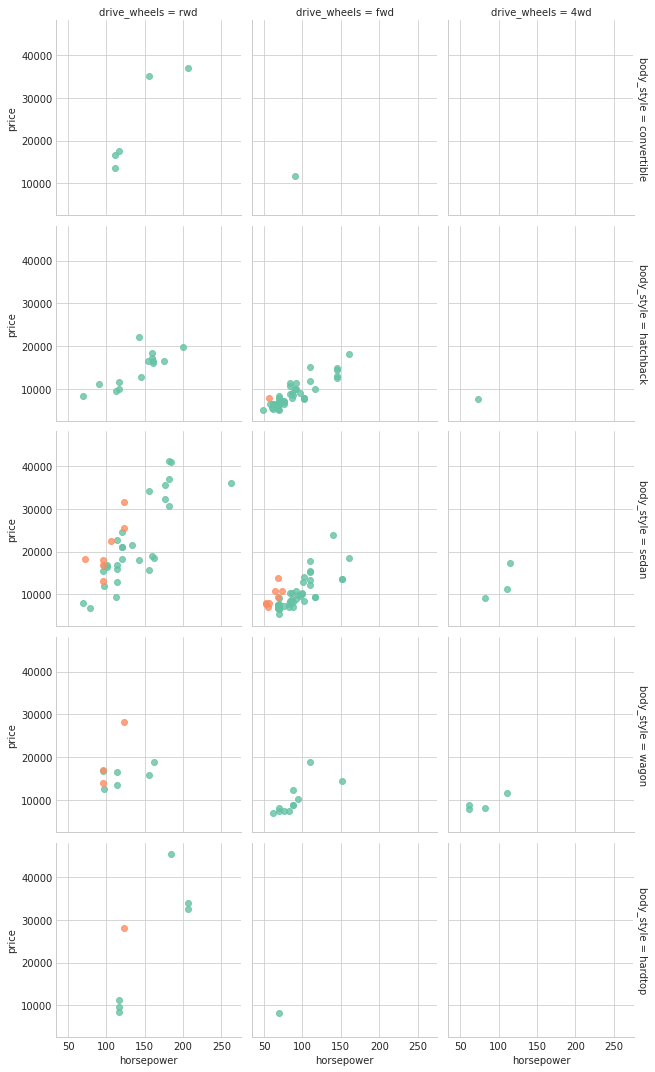

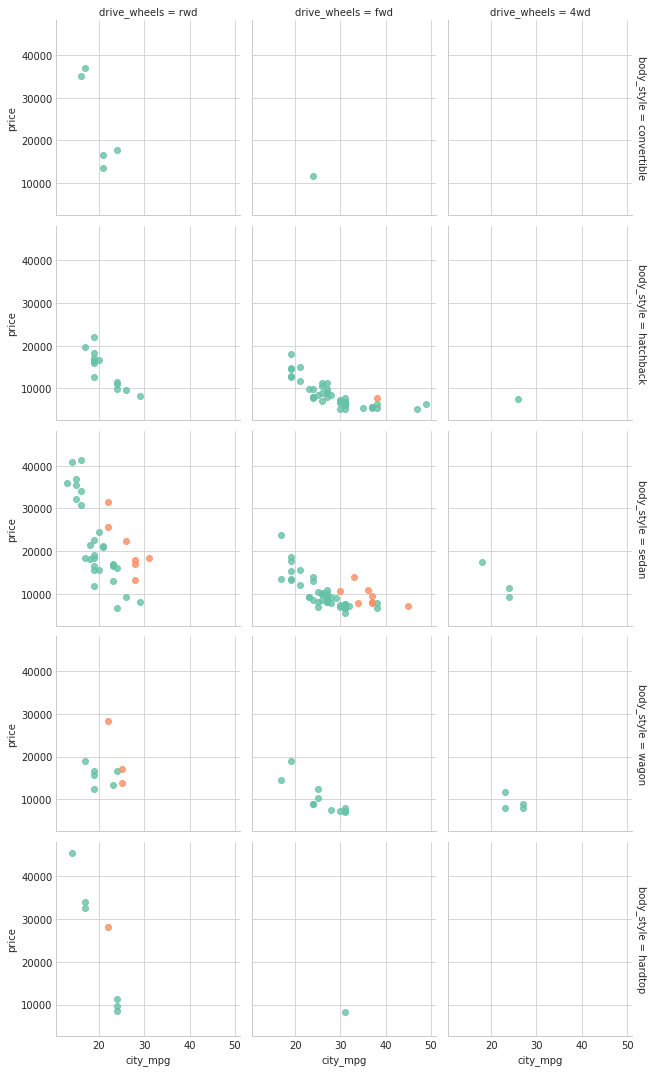

In [66]:
def cond_plot(cols):
    for col in cols:
        g = sns.FacetGrid(auto_prices, col="drive_wheels", row='body_style', 
                      hue="fuel_type", palette="Set2", margin_titles=True)
        g.map(sns.regplot, col, "price", label=col, fit_reg = False)

num_cols = ["curb_weight", "horsepower", "city_mpg"]
cond_plot(num_cols)  